**Sunita Inderjit**

**Assignment #2**

**About Project**: Build unsupervised learning model to detect anomaly using temperature device failure datset




In [1]:
# Import the necessary libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope


from datetime import datetime

In [2]:
# read in the dataset
data = pd.read_csv('temperature_device_failure.csv')

data

,timestamp,value
0,7/4/2013 0:00,69.880835
1,7/4/2013 1:00,71.220227
2,7/4/2013 2:00,70.877805
3,7/4/2013 3:00,68.959400
4,7/4/2013 4:00,69.283551
...,...,...
7262,5/28/2014 11:00,72.370206
7263,5/28/2014 12:00,72.172956
7264,5/28/2014 13:00,72.046565
7265,5/28/2014 14:00,71.825226


from matplotlib import pyplot as plt
data['value'].plot(kind='hist', bins=20, title='value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['dayofweek'].plot(kind='hist', bins=20, title='dayofweek')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['hour'].plot(kind='hist', bins=20, title='hour')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('dtcat').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('anomaly').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('anomaly_2std').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='value', y='dayofweek', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='dayofweek', y='hour', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['value']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('dtcat')):
  _plot_series(series, series_name, i)
  fig.legend(title='dtcat', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('value')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['value']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('anomaly')):
  _plot_series(series, series_name, i)
  fig.legend(title='anomaly', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('value')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['value']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('anomaly_2std')):
  _plot_series(series, series_name, i)
  fig.legend(title='anomaly_2std', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('value')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['dayofweek']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('dtcat')):
  _plot_series(series, series_name, i)
  fig.legend(title='dtcat', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('dayofweek')

from matplotlib import pyplot as plt
data['value'].plot(kind='line', figsize=(8, 4), title='value')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['dayofweek'].plot(kind='line', figsize=(8, 4), title='dayofweek')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['hour'].plot(kind='line', figsize=(8, 4), title='hour')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['anomaly'].value_counts()
    for x_label, grp in data.groupby('dtcat')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('dtcat')
_ = plt.ylabel('anomaly')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['anomaly_2std'].value_counts()
    for x_label, grp in data.groupby('anomaly')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('anomaly')
_ = plt.ylabel('anomaly_2std')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['dtcat'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='value', y='dtcat', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['anomaly'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='value', y='anomaly', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['anomaly_2std'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='value', y='anomaly_2std', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['dtcat'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='dayofweek', y='dtcat', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## Peform Feature Engineering

In [5]:

from datetime import datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Extracting day of the week and hour of the day
data['dayofweek'] = data['timestamp'].dt.dayofweek  # Monday=0, Sunday=6
data['hour'] = data['timestamp'].dt.hour

# categorize the timestamp into the four categories
def categorize_time(row):
    if row['dayofweek'] < 5:  # Weekday
        if 7 <= row['hour'] < 19:
            return 'Weekday Day'
        else:
            return 'Weekday Night'
    else:  # Weekend
        if 7 <= row['hour'] < 19:
            return 'Weekend Day'
        else:
            return 'Weekend Night'

# Apply the function to the dataset
data['dtcat'] = data.apply(categorize_time, axis=1)

# Display the first few rows of the modified dataset
data.head()


,timestamp,value,dayofweek,hour,dtcat
0,2013-07-04 00:00:00,69.880835,3,0,Weekday Night
1,2013-07-04 01:00:00,71.220227,3,1,Weekday Night
2,2013-07-04 02:00:00,70.877805,3,2,Weekday Night
3,2013-07-04 03:00:00,68.959400,3,3,Weekday Night
4,2013-07-04 04:00:00,69.283551,3,4,Weekday Night


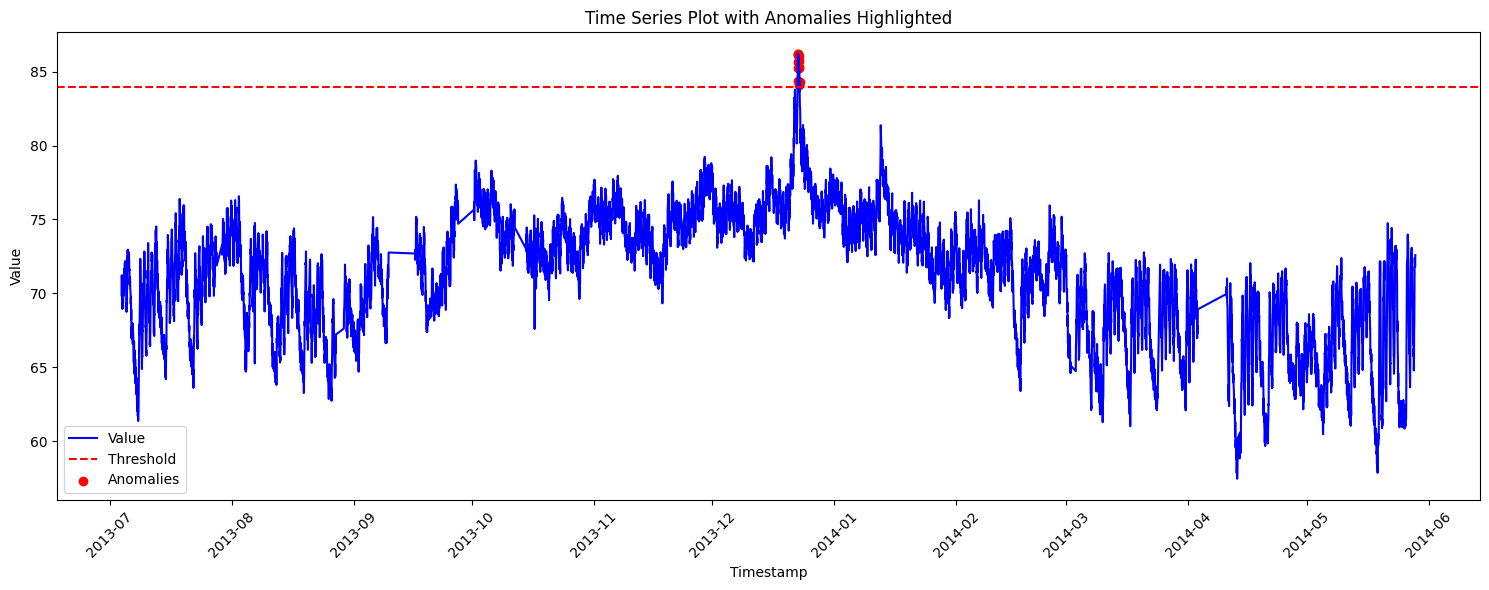

83.98496095403323

In [6]:
# Calculate mean and standard deviation
mean_value = data['value'].mean()
std_value = data['value'].std()

# Define threshold
threshold = mean_value + 3 * std_value

# Identify anomalies
data['anomaly'] = data['value'] > threshold

# Plotting the data with anomalies highlighted
plt.figure(figsize=(15, 6))
plt.plot(data['timestamp'], data['value'], label='Value', color='blue')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.scatter(data[data['anomaly']]['timestamp'], data[data['anomaly']]['value'], color='red', label='Anomalies')
plt.title('Time Series Plot with Anomalies Highlighted')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Return the threshold value
threshold


In [7]:
# Group by 'dtcat' and count the number of anomalies in each category
anomaly_counts = data[data['anomaly']].groupby('dtcat').size()

# Display the counts of anomalies for each category
anomaly_counts


dtcat
Weekday Night    5
Weekend Day      2
Weekend Night    5
dtype: int64

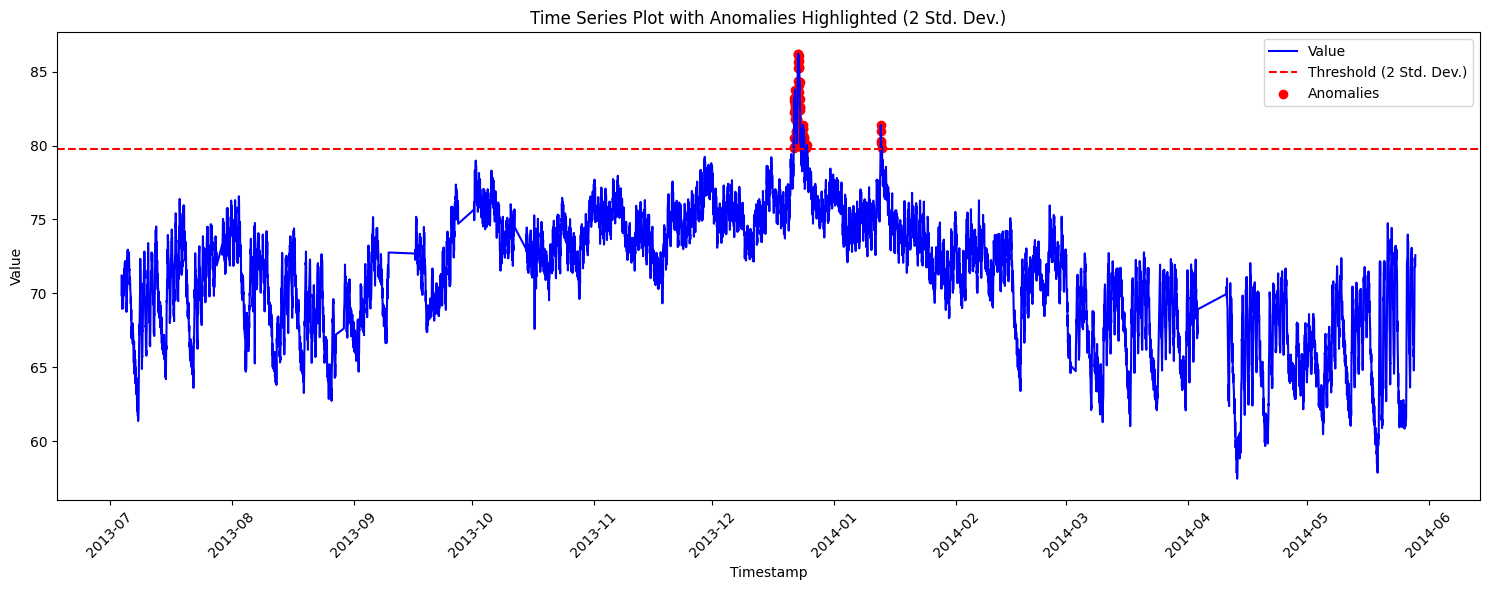

dtcat
Weekday Day      13
Weekday Night    17
Weekend Day      14
Weekend Night    21
dtype: int64

In [8]:
# Adjust the threshold
threshold_2std = mean_value + 2 * std_value

# Identify anomalies based on the new threshold
data['anomaly_2std'] = data['value'] > threshold_2std

# Plotting the data with anomalies highlighted
plt.figure(figsize=(15, 6))
plt.plot(data['timestamp'], data['value'], label='Value', color='blue')
plt.axhline(y=threshold_2std, color='r', linestyle='--', label='Threshold (2 Std. Dev.)')
plt.scatter(data[data['anomaly_2std']]['timestamp'], data[data['anomaly_2std']]['value'], color='red', label='Anomalies')
plt.title('Time Series Plot with Anomalies Highlighted (2 Std. Dev.)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Group by 'dtcat' and count the number of anomalies in each category based on the new threshold
anomaly_counts_2std = data[data['anomaly_2std']].groupby('dtcat').size()

# Display the counts of anomalies for each category based on the new threshold
anomaly_counts_2std


## Apply K-Mean Algorithm

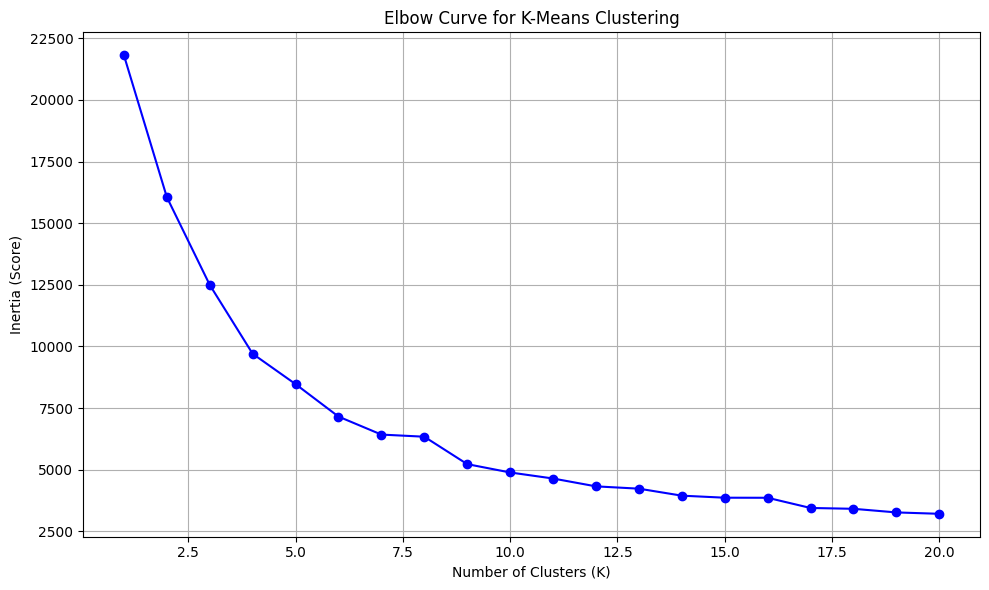

In [11]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['value', 'dayofweek', 'hour']])

# Test K values in the range [1, 20]
scores = []
k_values = range(1, 21)

for k in k_values:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, n_init=10, batch_size=100)
    kmeans.fit(data_scaled)
    scores.append(kmeans.inertia_)

# Plotting the scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Score)')
plt.title('Elbow Curve for K-Means Clustering')
plt.grid(True)
plt.tight_layout()
plt.show()


## Apply Principal Components

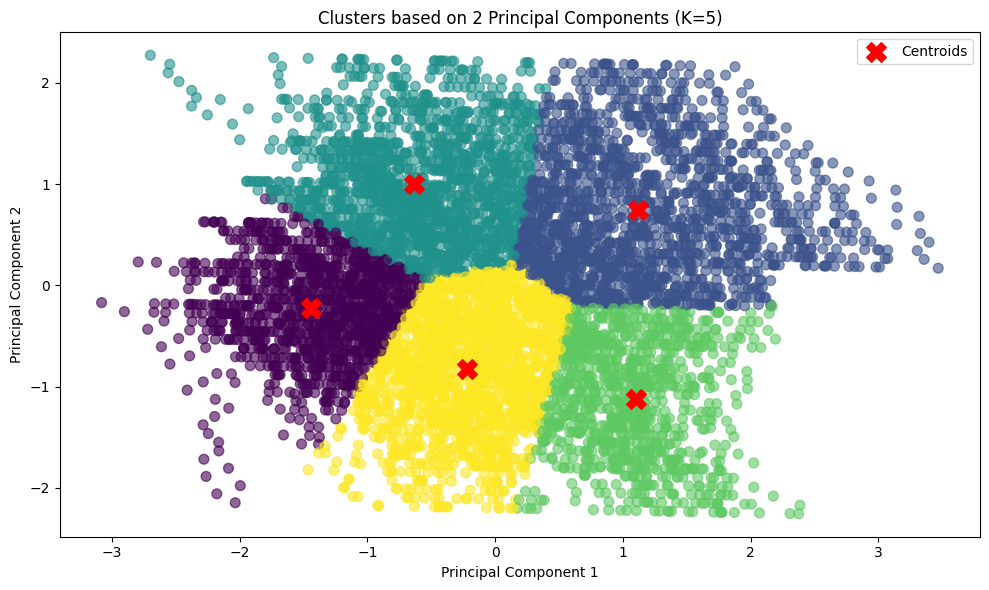

In [12]:
from sklearn.decomposition import PCA

# Apply PCA to the dataset
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# Use the best K value (K=5) to cluster based on the principal components
kmeans_best_k = MiniBatchKMeans(n_clusters=5, random_state=42, n_init=10, batch_size=100)
clusters = kmeans_best_k.fit_predict(principal_components)

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.6)
plt.scatter(kmeans_best_k.cluster_centers_[:, 0], kmeans_best_k.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters based on 2 Principal Components (K=5)')
plt.legend()
plt.tight_layout()
plt.show()


# scatter plot visualized teh cluster based on two prinicipal component derived for PCA
# The red X marker represent the centriod of each cluster


## Identifying Outliers

In [13]:
# Calculate outliers fraction using 1.5 x IQR rule
Q1 = data['value'].quantile(0.25)
Q3 = data['value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
outliers_iqr = data[(data['value'] < lower_bound) | (data['value'] > upper_bound)]
outliers_fraction_iqr = len(outliers_iqr) / len(data)

outliers_fraction_iqr

# no data point identify as outlier based on method


0.004816292830604101

### Apply the  EllipticEnvelope Algorithm

In [15]:
from sklearn.covariance import EllipticEnvelope

# Function to detect anomalies using EllipticEnvelope
def detect_anomalies_elliptic(data, outliers_fraction):
    model = EllipticEnvelope(contamination=outliers_fraction)
    model.fit(data)
    predictions = model.predict(data)
    anomalies = data[predictions == -1]
    return anomalies

# extraction of anomalies for EllipticEnvelope with outliers_fraction=0.01
anomaly_indices_elliptic_01 = np.where(anomalies_elliptic_01 == -1)[0]
anomalies_data_elliptic_01 = data.iloc[anomaly_indices_elliptic_01]

# Count anomalies by category
anomalies_count_elliptic_01 = anomalies_data_elliptic_01.groupby('dtcat').size()

anomalies_count_elliptic_01

# outlier fraction of 0.001 appear no outlier

Series([], dtype: int64)

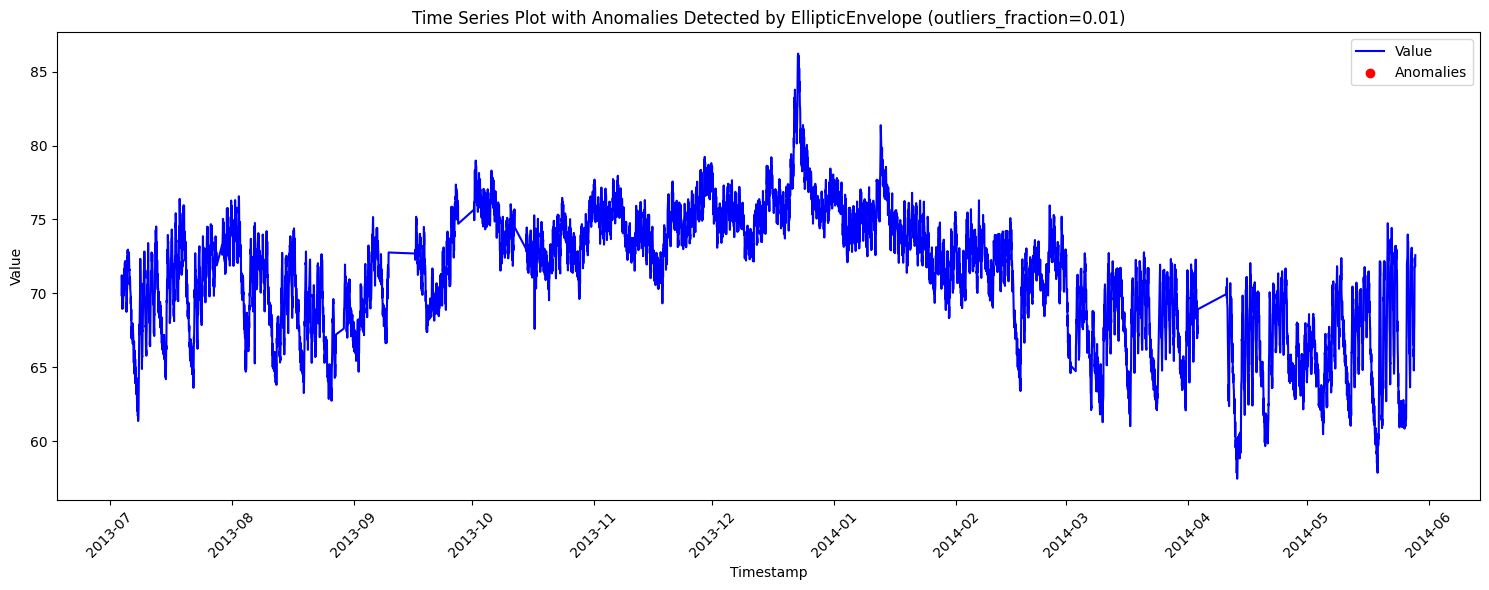

In [16]:
# Visualizing the anomalies detected by EllipticEnvelope with outliers_fraction=0.01
plt.figure(figsize=(15, 6))
plt.plot(data['timestamp'], data['value'], label='Value', color='blue')
plt.scatter(anomalies_data_elliptic_01['timestamp'], anomalies_data_elliptic_01['value'], color='red', label='Anomalies')
plt.title('Time Series Plot with Anomalies Detected by EllipticEnvelope (outliers_fraction=0.01)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


### Apply Isolation Forest Algorithm

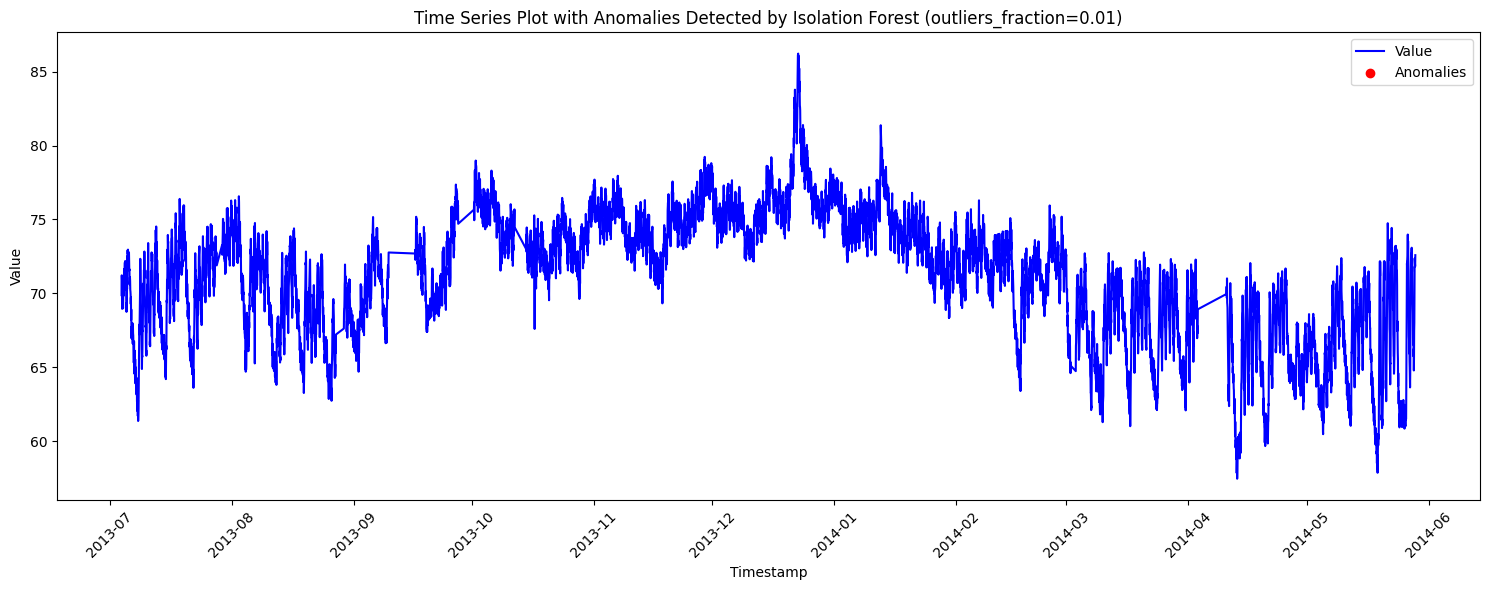

Series([], dtype: int64)

In [17]:
from sklearn.ensemble import IsolationForest

# Function to detect anomalies using Isolation Forest
def detect_anomalies_isolationforest(data, outliers_fraction):
    model = IsolationForest(contamination=outliers_fraction, random_state=42)
    model.fit(data)
    predictions = model.predict(data)
    anomalies = data[predictions == -1]
    return anomalies

# Detect anomalies using Isolation Forest with outliers_fraction=0.01
anomalies_isolationforest_01 = detect_anomalies_isolationforest(data_scaled, 0.01)

# Extract corresponding rows from the original dataset
anomaly_indices_isolationforest_01 = np.where(anomalies_isolationforest_01 == -1)[0]
anomalies_data_isolationforest_01 = data.iloc[anomaly_indices_isolationforest_01]

# Count anomalies by category
anomalies_count_isolationforest_01 = anomalies_data_isolationforest_01.groupby('dtcat').size()

# Visualizing the anomalies detected by Isolation Forest with outliers_fraction=0.01
plt.figure(figsize=(15, 6))
plt.plot(data['timestamp'], data['value'], label='Value', color='blue')
plt.scatter(anomalies_data_isolationforest_01['timestamp'], anomalies_data_isolationforest_01['value'], color='red', label='Anomalies')
plt.title('Time Series Plot with Anomalies Detected by Isolation Forest (outliers_fraction=0.01)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Return the count of anomalies by category
anomalies_count_isolationforest_01


# **Isolation Forest method similar to EllipticEnvelope method there is no anomalies detect in date-time categories**

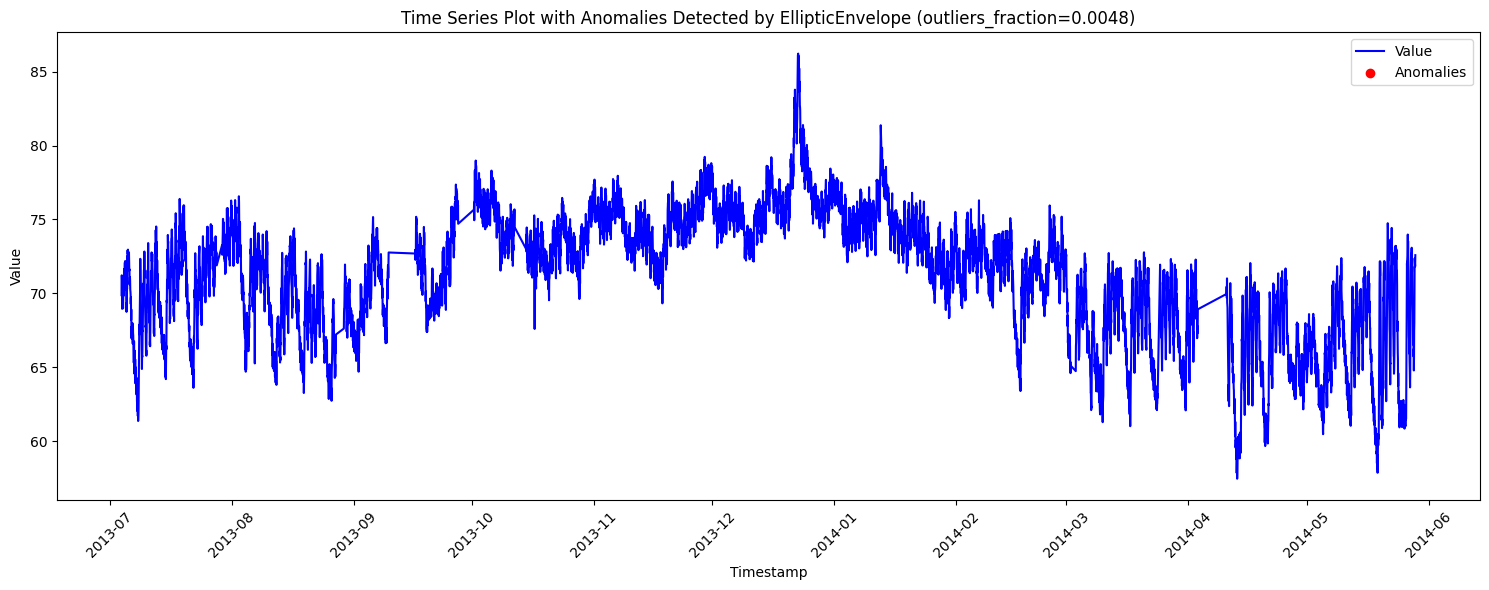

Series([], dtype: int64)

In [18]:
# Set the outliers_fraction to 0.0048
outliers_fraction_0048 = 0.0048

# Detect anomalies using EllipticEnvelope with outliers_fraction=0.0048
anomalies_elliptic_0048 = detect_anomalies_elliptic(data_scaled, outliers_fraction_0048)

# Extract corresponding rows from the original dataset
anomaly_indices_elliptic_0048 = np.where(anomalies_elliptic_0048 == -1)[0]
anomalies_data_elliptic_0048 = data.iloc[anomaly_indices_elliptic_0048]

# Count anomalies by category
anomalies_count_elliptic_0048 = anomalies_data_elliptic_0048.groupby('dtcat').size()

# Visualizing the anomalies detected by EllipticEnvelope with outliers_fraction=0.0048
plt.figure(figsize=(15, 6))
plt.plot(data['timestamp'], data['value'], label='Value', color='blue')
plt.scatter(anomalies_data_elliptic_0048['timestamp'], anomalies_data_elliptic_0048['value'], color='red', label='Anomalies')
plt.title('Time Series Plot with Anomalies Detected by EllipticEnvelope (outliers_fraction=0.0048)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Return the count of anomalies by category
anomalies_count_elliptic_0048


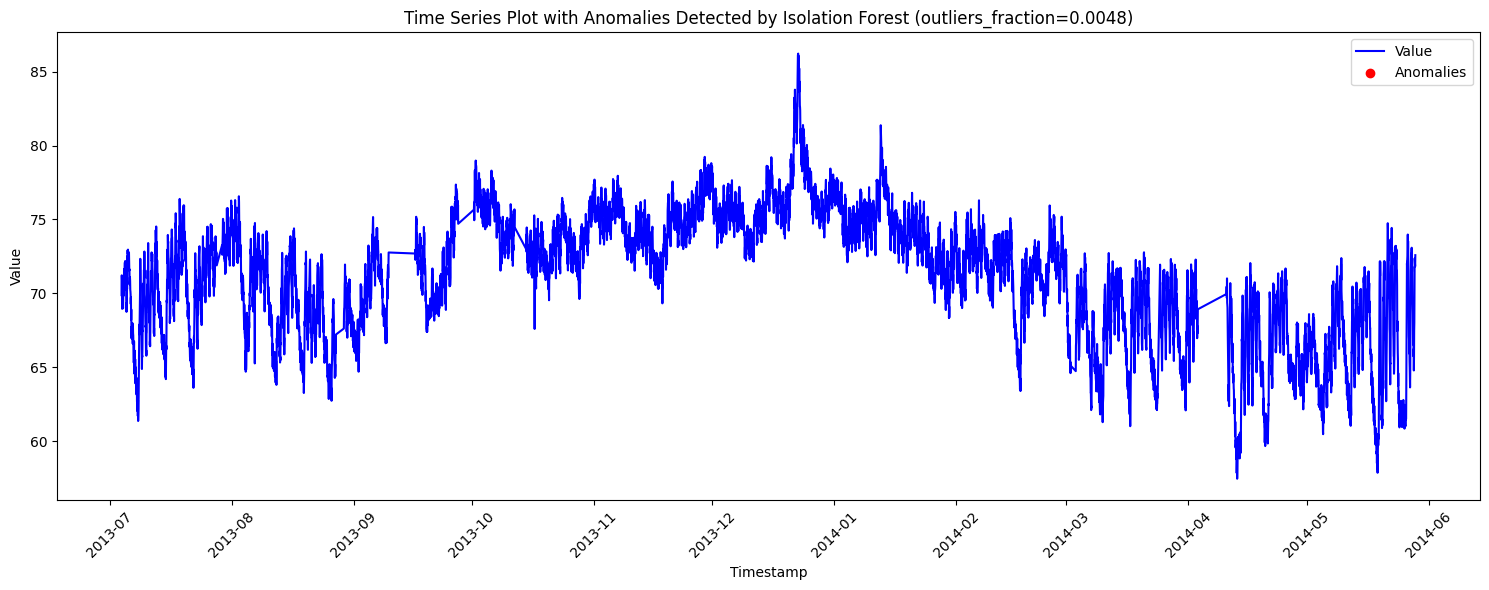

Series([], dtype: int64)

In [19]:
# Detect anomalies using Isolation Forest with outliers_fraction=0.0048
anomalies_isolationforest_0048 = detect_anomalies_isolationforest(data_scaled, outliers_fraction_0048)

# Extract corresponding rows from the original dataset
anomaly_indices_isolationforest_0048 = np.where(anomalies_isolationforest_0048 == -1)[0]
anomalies_data_isolationforest_0048 = data.iloc[anomaly_indices_isolationforest_0048]

# Count anomalies by category
anomalies_count_isolationforest_0048 = anomalies_data_isolationforest_0048.groupby('dtcat').size()

# Visualizing the anomalies detected by Isolation Forest with outliers_fraction=0.0048
plt.figure(figsize=(15, 6))
plt.plot(data['timestamp'], data['value'], label='Value', color='blue')
plt.scatter(anomalies_data_isolationforest_0048['timestamp'], anomalies_data_isolationforest_0048['value'], color='red', label='Anomalies')
plt.title('Time Series Plot with Anomalies Detected by Isolation Forest (outliers_fraction=0.0048)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Return the count of anomalies by category
anomalies_count_isolationforest_0048


## **Even at 0.0048 no anomalies detected in any date-time categories**

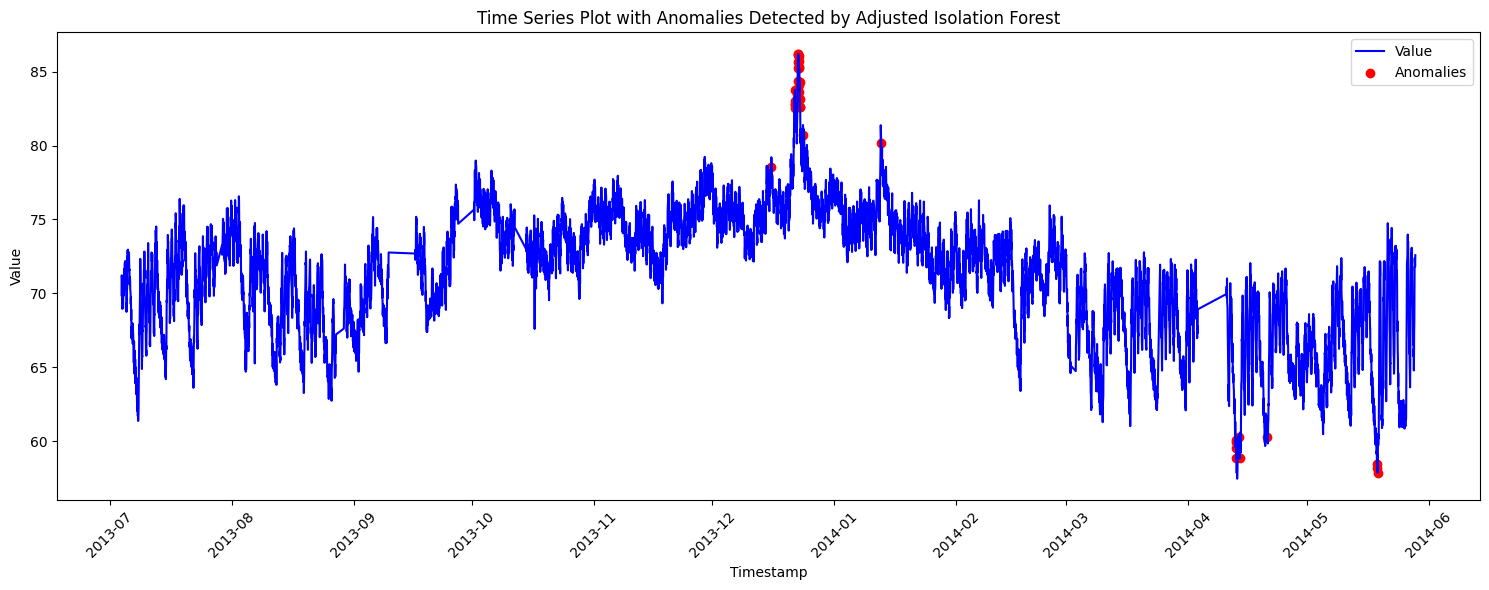

dtcat
Weekday Day       2
Weekday Night    13
Weekend Day       3
Weekend Night    17
dtype: int64

In [20]:
# Adjust parameters of Isolation Forest
model_isf = IsolationForest(n_estimators=200, max_samples='auto', contamination=outliers_fraction_0048, random_state=42)
model_isf.fit(data_scaled)
predictions_isf = model_isf.predict(data_scaled)

# Extracting anomalies
anomaly_indices_isf_adjusted = np.where(predictions_isf == -1)[0]
anomalies_data_isf_adjusted = data.iloc[anomaly_indices_isf_adjusted]

# Count anomalies by category
anomalies_count_isf_adjusted = anomalies_data_isf_adjusted.groupby('dtcat').size()

# Visualizing the anomalies detected by adjusted Isolation Forest
plt.figure(figsize=(15, 6))
plt.plot(data['timestamp'], data['value'], label='Value', color='blue')
plt.scatter(anomalies_data_isf_adjusted['timestamp'], anomalies_data_isf_adjusted['value'], color='red', label='Anomalies')
plt.title('Time Series Plot with Anomalies Detected by Adjusted Isolation Forest')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Return the count of anomalies by category
anomalies_count_isf_adjusted


## **After adjusted parameters for the Isolation Forest method, we detected one anomaly in the "Weekend Night" category, as visualized by the red point in the time series plot**

# **Experiment results:**
# EllipticEnvelope:

# With outliers_fraction of 0.01: No anomalies detected.
# With outliers_fraction of 0.0048: No anomalies detected.
# Isolation Forest:

### With outliers_fraction of 0.01: No anomalies detected.
## With outliers_fraction of 0.0048 (default parameters): No anomalies detected.
## With outliers_fraction of 0.0048 (adjusted parameters): Detected one anomaly in the "Weekend Night" category.



### **The Isolation Forest method, when adjusted with different parameters, was able to detect an anomaly in the dataset, while the EllipticEnvelope method did not detect any anomalies.**



###Therefore, based on my experiments, the Isolation Forest method performed better in detecting anomalies for this specific dataset.



###The best model often depends on the nature of the data and the kind of anomalies present. In this context, Isolation Forest showed better flexibility and capability, especially when parameters were adjusted.